In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

 THE LOGIC

In [7]:
def create_grid():
    return np.full((3, 3), ' ', dtype='<U1')

In [8]:
def check_winner(board, player):
    # Vectorized check for all win conditions
    # axis=1 checks rows, axis=0 checks columns
    if np.any(np.all(board == player, axis=1)): return True       
    if np.any(np.all(board == player, axis=0)): return True       
    if np.all(np.diag(board) == player): return True              
    if np.all(np.diag(np.fliplr(board)) == player): return True   
    return False

In [9]:

def is_board_full(board):
    return np.all(board != ' ')

In [10]:
def get_random_move(board):
    empty_spots = np.argwhere(board == ' ')
    if len(empty_spots) > 0:
        return random.choice(empty_spots)
    return None

 THE SIMULATION FUNCTION

In [7]:
def simulate_one_game():
    # EVERYTHING below needs to be indented inside this function!
    board = create_grid()
    current_player = 'X' # X always goes first
    
    while True:
        # 1. Computer makes a move
        move = get_random_move(board)
        
        # If no moves left, it's a draw (Safety check)
        if move is None: 
            return 'Draw' 
        
# 2. Apply move
        # Note: move is an array [row, col], we convert to tuple for indexing
        board[tuple(move)] = current_player 
        
        # 3. Check Win
        if check_winner(board, current_player):
            return current_player # Returns 'X' or 'O'
            
        # 4. Check Draw
        if is_board_full(board):
            return 'Draw'
            
        # 5. Switch Player
        current_player = 'O' if current_player == 'X' else 'X'


num_simulations = 1000
results = []

print(f"🔄 Simulating {num_simulations} games... please wait.")

for _ in range(num_simulations):
    winner = simulate_one_game()
    results.append(winner)

print("✅ Simulation Complete!")

# --- Calculate Stats ---
x_wins = results.count('X')
o_wins = results.count('O')
draws = results.count('Draw')

print(f"\n📊 Results:")
print(f"X Wins: {x_wins} ({(x_wins/num_simulations)*100:.1f}%)")
print(f"O Wins: {o_wins} ({(o_wins/num_simulations)*100:.1f}%)")
print(f"Draws:  {draws} ({(draws/num_simulations)*100:.1f}%)")

🔄 Simulating 1000 games... please wait.
✅ Simulation Complete!

📊 Results:
X Wins: 579 (57.9%)
O Wins: 294 (29.4%)
Draws:  127 (12.7%)


VISUALIZATION

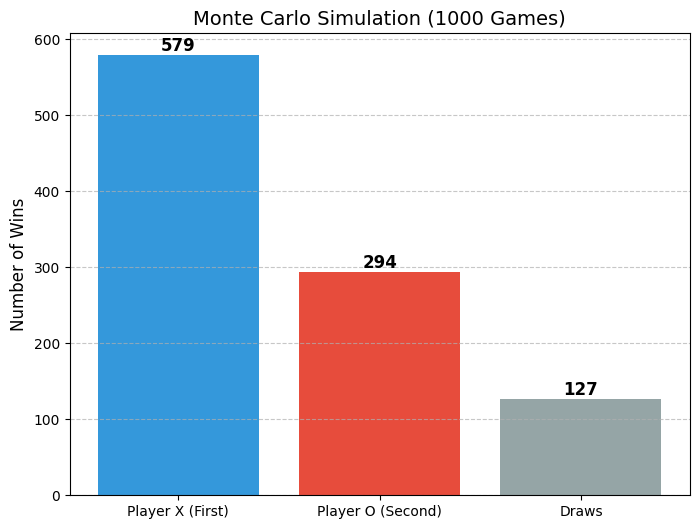

In [8]:
labels = ['Player X (First)', 'Player O (Second)', 'Draws']
counts = [x_wins, o_wins, draws]
colors = ['#3498db', '#e74c3c', '#95a5a6'] 

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=colors)

plt.title(f'Monte Carlo Simulation ({num_simulations} Games)', fontsize=14)
plt.ylabel('Number of Wins', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

🎲 Project: The Statistical Fairness of Tic-Tac-Toe
Objective: To analyze the "First Mover Advantage" in a zero-sum game using Monte Carlo simulations.

Methodology:

1. Built a game engine using NumPy for efficient state management.

2. Simulated 1,000 matches between two random-decision agents.

3. Visualized the distribution of outcomes to determine probability skew.

Tools: Python, NumPy, Matplotlib